In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(lungcap)

In [3]:
str(lungcap)

'data.frame':	654 obs. of  5 variables:
 $ Age   : int  3 4 4 4 4 4 4 5 5 5 ...
 $ FEV   : num  1.072 0.839 1.102 1.389 1.577 ...
 $ Ht    : num  46 48 48 48 49 49 50 46.5 49 49 ...
 $ Gender: Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Smoke : int  0 0 0 0 0 0 0 0 0 0 ...


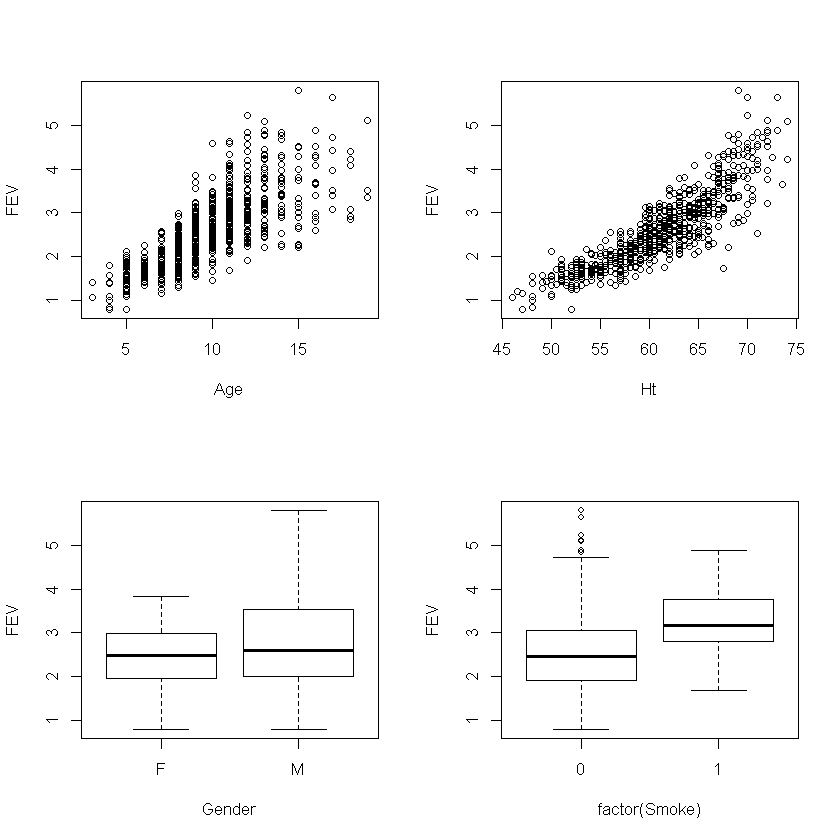

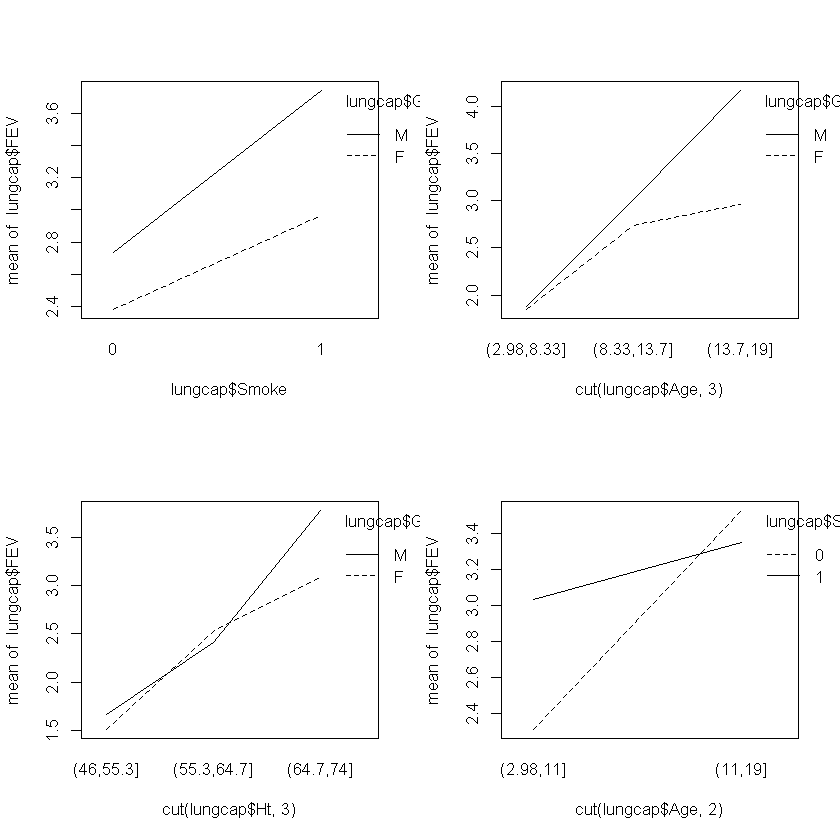

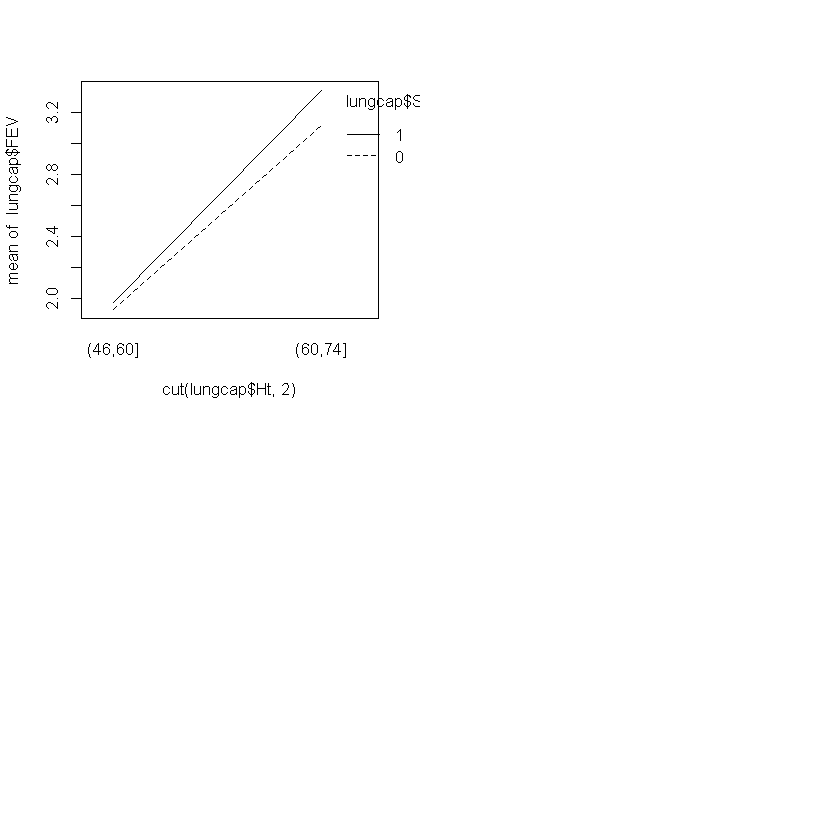

In [7]:
par(mfrow=c(2, 2))
plot(FEV ~ Age, data=lungcap)
plot(FEV ~ Ht, data=lungcap)
plot(FEV ~ Gender, data=lungcap)
plot(FEV ~ factor(Smoke), data=lungcap)
interaction.plot( lungcap$Smoke, lungcap$Gender, lungcap$FEV)
interaction.plot(cut(lungcap$Age, 3), lungcap$Gender, lungcap$FEV)
interaction.plot(cut(lungcap$Ht, 3), lungcap$Gender, lungcap$FEV)
interaction.plot(cut(lungcap$Age, 2), lungcap$Smoke, lungcap$FEV)
interaction.plot(cut(lungcap$Ht, 2), lungcap$Smoke, lungcap$FEV)

In [11]:
m.max <- glm(FEV ~ Age*Ht*Gender*factor(Smoke), data=lungcap, family = Gamma(link="log"))
m.min <- glm(FEV ~ 1, data=lungcap, family = Gamma(link="log"))

mf <- step(m.min, scope=list(lower=m.min, upper=m.max),
direction="forward")

Start:  AIC=1615.07
FEV ~ 1

                Df Deviance    AIC
+ Ht             1   14.453 1096.1
+ Age            1   28.851 1229.2
+ factor(Smoke)  1   67.055 1582.5
+ Gender         1   67.709 1588.6
<none>               70.791 1615.1

Step:  AIC=568.61
FEV ~ Ht

                Df Deviance    AIC
+ Age            1   13.646 532.89
+ Gender         1   14.398 568.01
<none>               14.453 568.61
+ factor(Smoke)  1   14.453 570.57

Step:  AIC=532.86
FEV ~ Ht + Age

                Df Deviance    AIC
+ Gender         1   13.494 527.39
+ factor(Smoke)  1   13.547 529.98
<none>               13.646 532.86
+ Age:Ht         1   13.644 534.78

Step:  AIC=527.55
FEV ~ Ht + Age + Gender

                Df Deviance    AIC
+ factor(Smoke)  1   13.414 525.52
<none>               13.494 527.55
+ Ht:Gender      1   13.485 529.05
+ Age:Gender     1   13.487 529.16
+ Age:Ht         1   13.492 529.43

Step:  AIC=525.61
FEV ~ Ht + Age + Gender + factor(Smoke)

                       Df Devianc

In [12]:
m.1 <- glm(FEV ~ Age*Ht*Gender*factor(Smoke), data=lungcap, family = Gamma(link="log"))

In [13]:
coef(summary(m1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.499854375,0.3080138193,-8.116046,2.483606e-15
Age,0.112977743,0.0399980898,2.824578,4.882197e-03
Ht,0.051642639,0.0053207981,9.705807,7.253850e-21
GenderM,0.986598403,0.4019120566,2.454762,1.436371e-02
factor(Smoke)1,11.669473074,4.8617195743,2.400277,1.666816e-02
Age:Ht,-0.001408354,0.0006412511,-2.196261,2.843239e-02
Age:GenderM,-0.133958372,0.0495625585,-2.702814,7.058540e-03
Ht:GenderM,-0.015207154,0.0069017912,-2.203363,2.792575e-02
Age:factor(Smoke)1,-0.807520140,0.3676663964,-2.196339,2.842675e-02
Ht:factor(Smoke)1,-0.175762272,0.0749896570,-2.343820,1.939334e-02


In [19]:
gof.dev <- deviance(m.1)
gof.pearson <- sum(m.1$weights * m.1$residuals^2)

pchisq(gof.dev, df=df.residual(m.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(m.1), lower.tail = FALSE)

gof.dev / df.residual(m.1)
gof.pearson / df.residual(m.1)

[1] 1

[1] 1

[1] 0.02013141

[1] 0.01947895


	Shapiro-Wilk normality test

data:  qr1
W = 0.99329, p-value = 0.005063


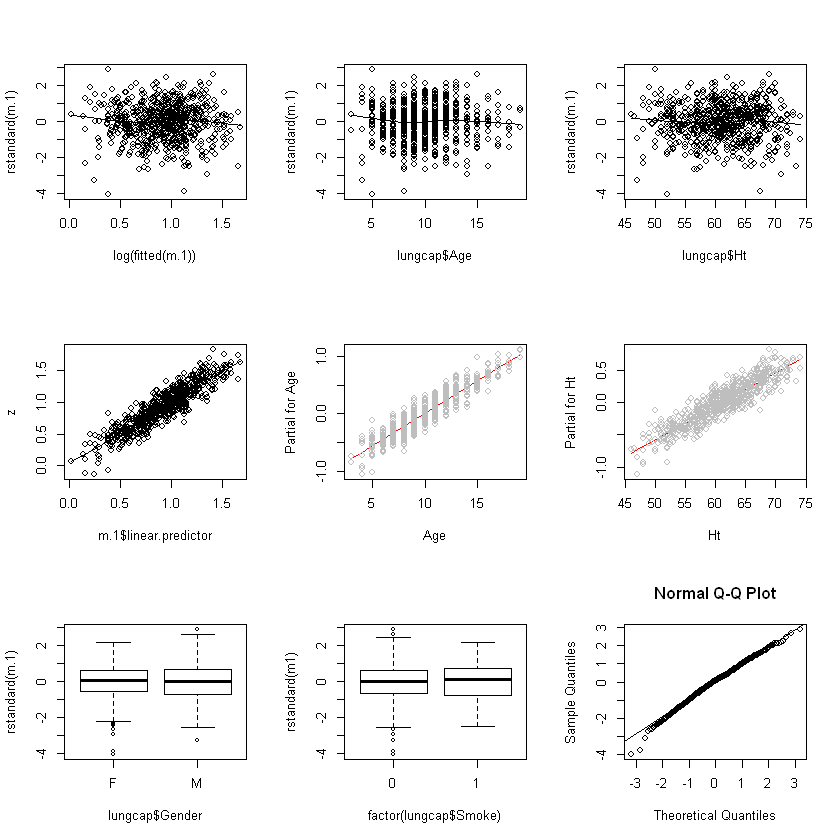

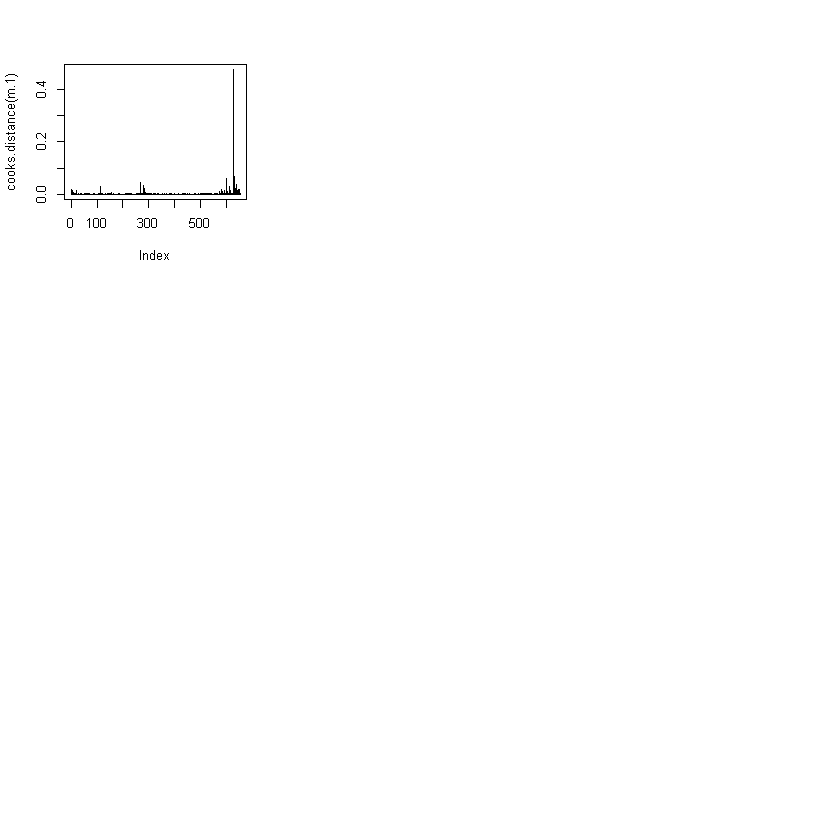

In [16]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(m.1) ~ log(fitted(m.1)))
scatter.smooth(rstandard(m.1) ~ lungcap$Age)
scatter.smooth(rstandard(m.1) ~ lungcap$Ht)
z <- resid(m.1, type="working") + m.1$linear.predictor
scatter.smooth(z ~ m.1$linear.predictor)
termplot(m.1, partial.resid = TRUE, terms="Age")
termplot(m.1, partial.resid = TRUE, terms="Ht")
plot(rstandard(m.1) ~ lungcap$Gender)
plot(rstandard(m1) ~ factor(lungcap$Smoke))
qqnorm(qr1 <- qresid(m.1))
qqline(qr1)
plot(cooks.distance(m.1), type="h")
shapiro.test(qr1)

In [18]:
colSums(influence.measures(m.1)$is.inf)

dfb.1_     dfb.Age      dfb.Ht    dfb.GndM    dfb.f(S)    dfb.Ag:H 
          0           0           0           0           0           0 
  dfb.Ag:GM   dfb.Ht:GM    dfb.A:(S    dfb.H:(S    dfb.GM:( dfb.Ag:H:GM 
          0           0           0           0           0           0 
  dfb.A:H:(   dfb.A:GM:   dfb.H:GM: dfb.A:H:GM:       dffit       cov.r 
          0           0           0           0          23          72 
     cook.d         hat 
          0          45